In [1074]:
import numpy as np
import pandas as pd
from datetime import date
import pickle as pkl
import os
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [1075]:
ingredients_recipes = {}
author_recipes = {}
time_recipes = {}

In [1076]:
def read_file(path):
    file = pd.read_csv(path)
    df = pd.DataFrame(file)
    return df

In [1077]:
def create_array_time(df):
    array_time = []

    for i in range(len(df)):
        time = df["Total Time"][i]
        if time == "X":
            array_time.append(0)
        elif len(time) == 3:      #1 d ou 1 h ou 1 m                                      
            divide = time.split(" ")
            if divide[1] == "h":
                array_time.append(int(divide[0]) * 60)
            elif divide[1] == "m":
                array_time.append(int(divide[0]))
            elif divide[1] == "d":
                array_time.append(int(divide[0]) * 24 * 60)
        elif len(time) == 4:    #30 m ou 10 h
            if 'm' in time:
                array_time.append(int(time.split(" m")[0]))
            elif 'h' in time:
                array_time.append(int(time.split(" h")[0]) * 60)
            
        elif len(time) == 8 or len(time) == 7:
            t = 0
            if 'd' in time:     #1 d 1 h ou 1 d 30 m
                divide = time.split(" d ")
                t += int(divide[0]) * 60 * 24
                if 'm' in divide[1]:
                    t += int(divide[1].split(" m")[0])
                elif 'h' in divide[1]:
                    t += int(divide[1].split(" h")[0]) * 60
            elif 'h' in time:       #12 h 2 m ou 1 h 20 m ou 1 h 2 m
                divide = time.split(" h ")
                t += int(divide[0]) * 60 + int(divide[1].split(" m")[0])
            
            array_time.append(t)
        elif len(time) == 9:    #12 h 20 m ou 12 d 12 h ou 12 d 20 m
            t = 0
            if "d" in time:
                divide = time.split(" d ")
                t += int(divide[0]) * 24 * 60
                if "m" in divide[1]:
                    t += int(divide[1].split(" m")[0])
                elif "h" in divide[1]:
                    t += int(divide[1].split(" h")[0])
            elif "h" in time:
                divide = time.split(" h ")
                t += int(divide[0]) * 60 + int(divide[1].split(" m")[0])
            array_time.append(t)
        elif len(time) == 11 or len(time) == 12 or len(time) == 13 or len(time) == 14:     #1 d 1 h 5 m ou 1 d 1 h 50 m ou 1 d 10 h 50 m ou 10 d 10 h 50 m
            divide = time.split(" d ")
            t = int(divide[0]) * 24 * 60
            div = divide[1].split(" h ")
            t += int(div[0]) * 60 + int(div[1].split(" m")[0])
            array_time.append(t)
            
    return array_time

In [1078]:
def create_ingredients_recipes(df):
    for i in range(len(df)):
        ingredients = df["Ingredients"][i]
        list_ingred = ingredients.split(',')
        for ing in list_ingred:
            if ing not in ingredients_recipes:
                ingredients_recipes[ing] = [df["Recipe Name"][i]]
            else:
                ingredients_recipes[ing].append(df["Recipe Name"][i])

In [1079]:
def create_author_recipes(df):
    for i in range(len(df)):
        author = df["Author"][i]
        if author not in author_recipes:
            author_recipes[author] = [df["Recipe Name"][i]]
        else:
            author_recipes[author].append(df["Recipe Name"][i])

In [1080]:
def create_time_recipes(df):
    global time_recipes
    for i in range(len(df)):
        time = df["Total Time (min)"][i]
        if time not in time_recipes:
            time_recipes[time] = [df["Recipe Name"][i]]
        else:
            time_recipes[time].append(df["Recipe Name"][i])
            
    time_recipes = dict(sorted(time_recipes.items()))
    del time_recipes[0]

In [1081]:
def plot_distributions(dic, title, xlabel, ylabel, number, orientation, x, y, fontesize):
    x_values = [i for i in dic if len(dic[i]) > number]
    y_values = [len(dic[i]) for i in dic if len(dic[i]) > number]
    
    plt.figure(figsize=(x, y))
    plt.bar(x_values, y_values, color='blue')                
    plt.title(title)
    plt.xticks(rotation=orientation, fontsize=fontesize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [1082]:
def plot_top10_distributions(dic, top, title, xlabel, ylabel, orientation, x, y):
    new_dic = dict(sorted(dic.items(), key=lambda x: len(x[1]), reverse=True))
    x_values = []
    y_values = []
    count = 0
    for i in new_dic:
        x_values.append(i)
        y_values.append(len(new_dic[i]))
        if count == top:
            break
        count += 1
    
    plt.figure(figsize=(x, y))
    plt.bar(x_values, y_values, color='blue')                
    plt.title(title)
    plt.xticks(rotation=orientation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [1083]:
def plot_pca(df):
    variaveis_selecionadas = ["Total Time", "Ingredients", "Review Count"]

    x = df[variaveis_selecionadas]

    x_scaled = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_scaled)

    plt.scatter(x_pca[:, 0], x_pca[:, 1])
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA of Receitas Dataset")
    plt.show()

In [1084]:
def user_interface():
    print("-"*40 + " Welcome to Pendia " + "-"*40)
    print("1- Log In;\n2- Sing In;\n0- Leave;")
    option = input("1- Log In\n2- Sing In\n0- Leave\n")
    print(option)
    name = ""
    password = ""
    while option != "0":
        state = False
        if os.path.exists("users.pkl"):
            with open("users.pkl", 'rb') as arq:
                d_users =  pkl.load(arq)
        else:
            d_users = {}
        if option == "1" and d_users == {}:
            print("Without users")
        elif option == "1":
            while(1):
                name = input("Name: ")
                print("Name: " + name)
                if name in d_users:
                    break
                else:
                    print("Incorret Name")
            while(1):
                password = input("Password: ")
                print("Password: " + password)
                if d_users[name] == password:
                    break
                else:
                    print("Incorret Password")
            print("-"*40 + " Hi " + name + " " + "-"*40)
            state = True
        elif option == "2":
            while(1):
                name = input("Name: ")
                print("Name: " + name)
                if name not in d_users:
                    password = input("Password: ")
                    print("Password: " + password)
                    d_users[name] = password
                    break
                else:
                    print("User Already exists")
            with open("users.pkl", 'wb') as arq:
                pkl.dump(d_users, arq)
            print("-"*40 + " Hi " + name + " " + "-"*40)
            state = True
        else:
            print("Invalid Option")
        
        if state:
            option = "0"
        else:
            print("1- Log In;\n2- Sing In;\n0- Leave;")
            option = input("1- Log In;\n2- Sing In;\n0- Leave;\n")
            print(option)
    if state:
        path = "dataset/" + name + ".csv"
        df = read_file(path)
        display(df)
    else: 
        print("Bye, Have a Great Time!")
        return
    

        
    


In [1085]:
def main():
    path = "dataset/clean_recipes.csv"
    df = read_file(path)
    array_time = create_array_time(df)
    df["Total Time (min)"] = array_time
    
    create_ingredients_recipes(df)
    create_author_recipes(df)
    create_time_recipes(df)
    top = 5
    plot_distributions(ingredients_recipes, "Ingredients Distribution", "Ingredients", "Number of Recipes", 100, "vertical", 15, 5, 5) 
    plot_top10_distributions(ingredients_recipes, 10, "Top 10 Ingredients Distribution", "Top 10 Ingredients", "Number of Recipes", "horizontal", 10, 5)
    
    plot_distributions(author_recipes, "Author Distribution", "Authors", "Number of Recipes", 5, "vertical", 15, 5, 4) 
    plot_top10_distributions(author_recipes, 10, "Top 10 Authors Distribution", "Top 10 Authors", "Number of Recipes", "vertical", 10, 5)
    
    plot_distributions(time_recipes, "Time Distribution", "Time (min)", "Number of Recipes", 5, "horizontal", 15, 5, 10) 
    plot_top10_distributions(time_recipes, 10, "Top 10 Times Distribution", "Top 10 Times (min)", "Number of Recipes", "horizontal", 10, 5)

    # plot_pca(df)   
    # user_interface()

    
    

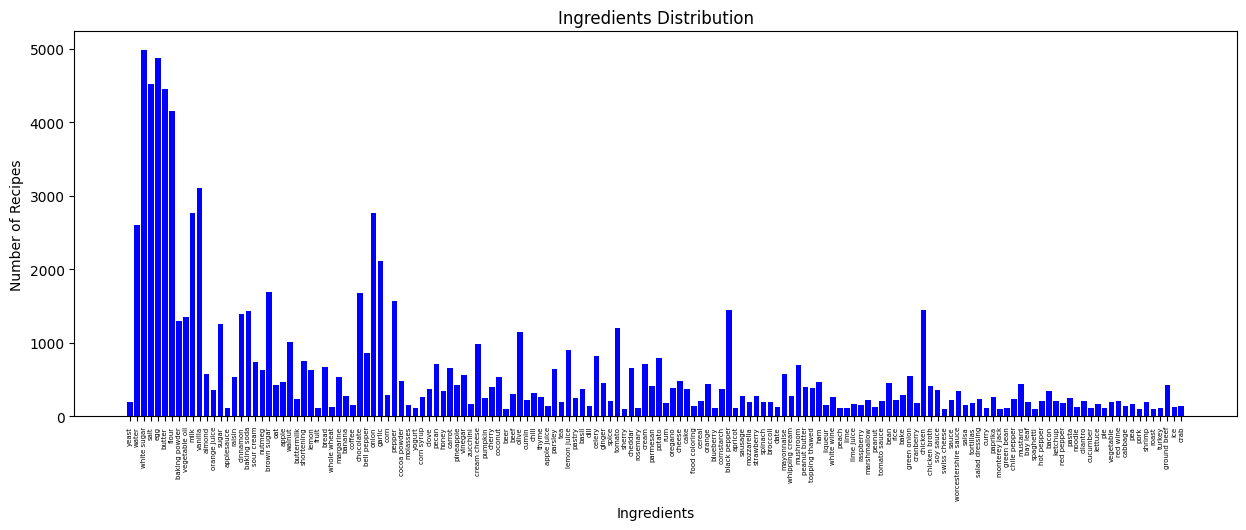

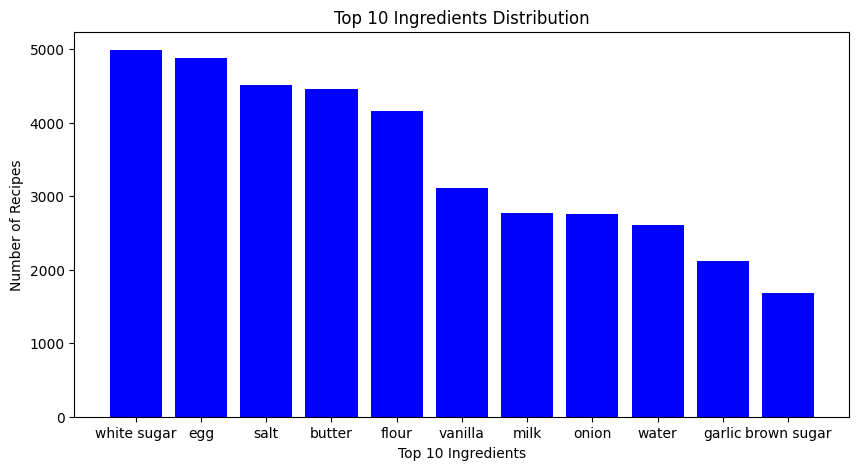

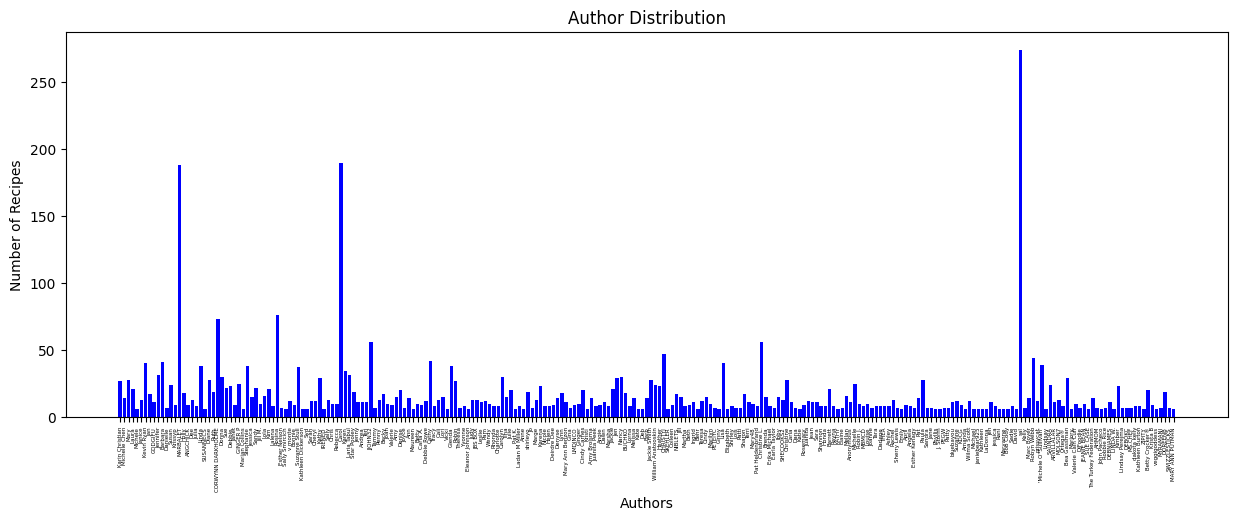

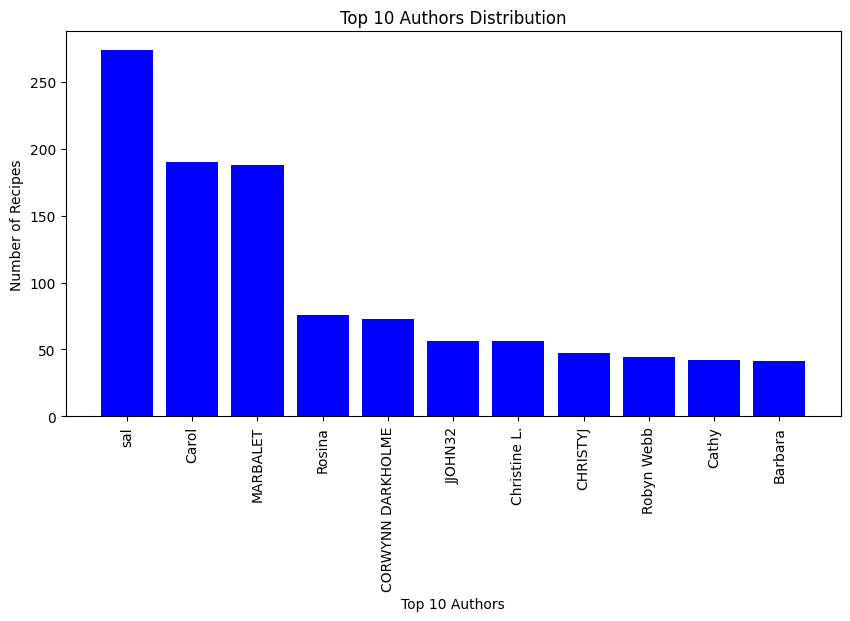

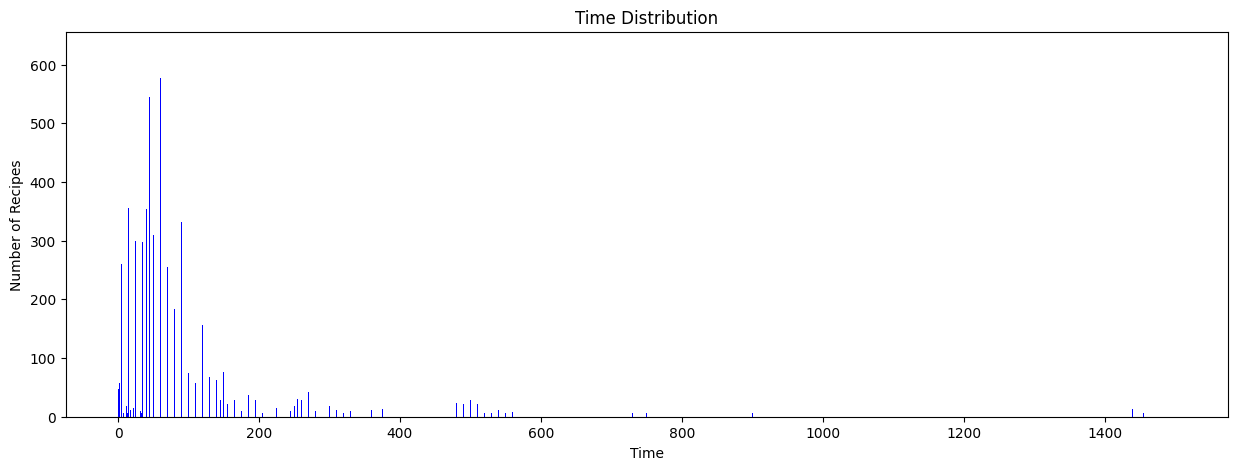

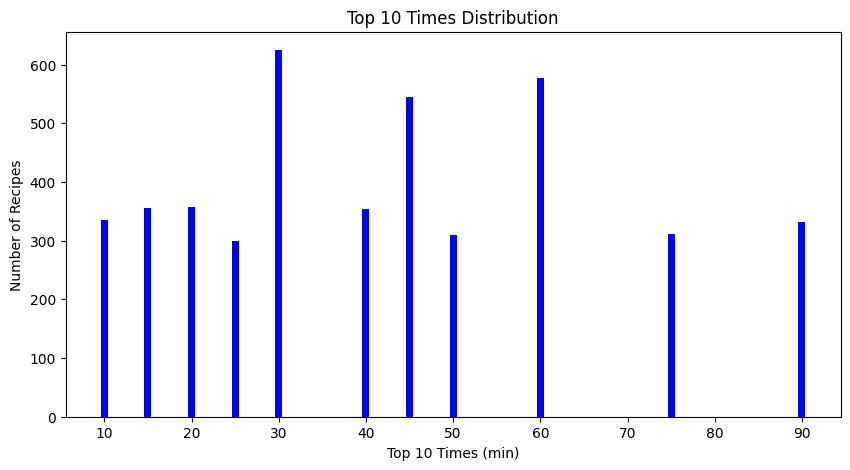

In [1086]:
if __name__ == '__main__':
    main()